## Computer Vision 
Sneha Tiwari

In this tutorial, I'll cover all the filtering techniques, sampling the image, Gaussian, Laplacian, then discrete wavelet transformation.

In [78]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import randint as randi
import math

from __future__ import print_function
import time
import math
import warnings

warnings.filterwarnings('ignore')

import numpy as np
from PIL import Image
from skimage import color, io
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

Reading, Displaying

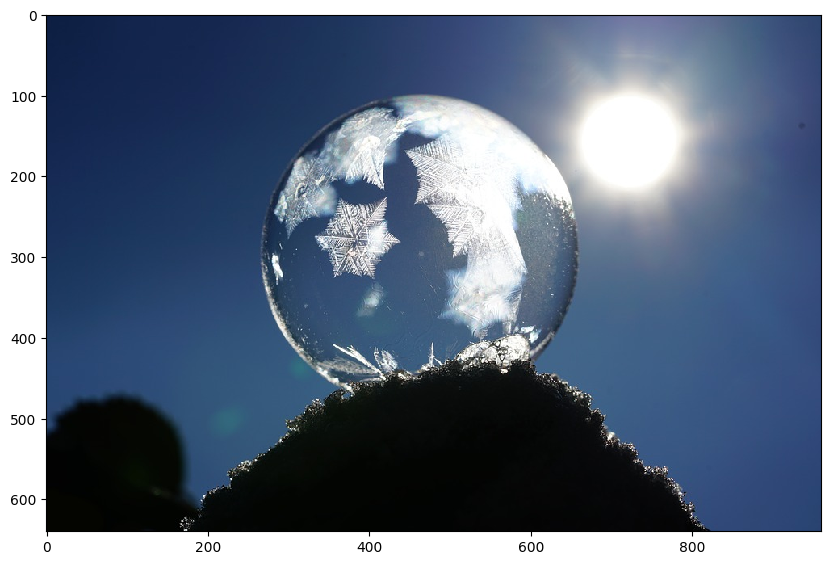

In [80]:
image1_path = 'image_1.jpg'
image2_path = 'image_2.png'
image3_path = 'image_3.png'
def display(img):
    plt.imshow(img)
    plt.show()
def load(image_path):
    out = None
    out  = io.imread(image_path,plugin='matplotlib')
    out = out.astype(np.float64) / 255
    return out

image1 = load(image1_path)

display(image1)

#### Average Filtering

3*3 Kernal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


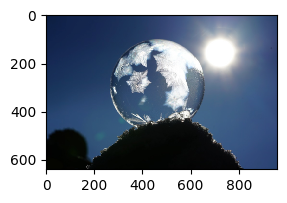

5*5 Kernal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


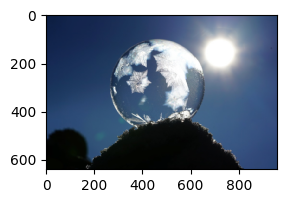

11*11 Kernal


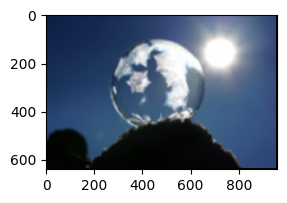

15*15 Kernal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


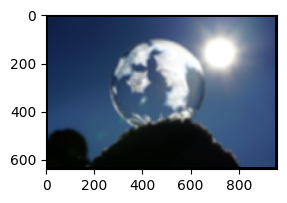

In [68]:
def average_filter(image, k):
    # k x k kernel for averaging
    kernel = np.ones((k, k, 3)) / (k * k)

    # dimensions of the image
    height, width = image.shape[:2]

    # Create a new image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Apply the kernel to each pixel in the image
    for i in range(k//2, height - k//2):
        for j in range(k//2, width - k//2):
            berd = image[i-k//2:i+k//2+1, j-k//2:j+k//2+1]
            filtered_image[i, j] = np.sum(berd * kernel, axis=(0, 1))

    return filtered_image

print("3*3 Kernal")
filtered_image_3 = average_filter(image1, 3)
display(filtered_image_3)
print("5*5 Kernal")
filtered_image_5 = average_filter(image1,5)
display(filtered_image_5)
print("11*11 Kernal")
filtered_image_11 = average_filter(image1,11)
display(filtered_image_11)
print("15*15 Kernal")
filtered_image_15 = average_filter(image1,15)
display(filtered_image_15)

Increasing the kernel size in average filtering has several effects on the resulting image. Here are a few key effects to consider:

Smoothing: Increasing the kernel size in average filtering results in a smoother image with less detail. This is because the larger kernel size averages out more of the high-frequency variations in the image, which can be useful for reducing noise or removing small details.

Blurring: Increasing the kernel size too much can result in excessive blurring of the image, which can make it difficult to discern important features or details. This is because the larger kernel size averages out not only the high-frequency variations but also the low-frequency variations, which can result in a loss of detail.

Computation time: Increasing the kernel size in average filtering also increases the computation time required to filter the image. This is because the larger kernel size requires more computations for each pixel in the image, which can be a bottleneck for real-time applications or large images.

### a)
#### Salt and Pepper Noise

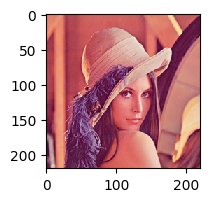

In [21]:
# Load an example RGB image
image2 = np.array(Image.open('image_2.png'))
display(image2)

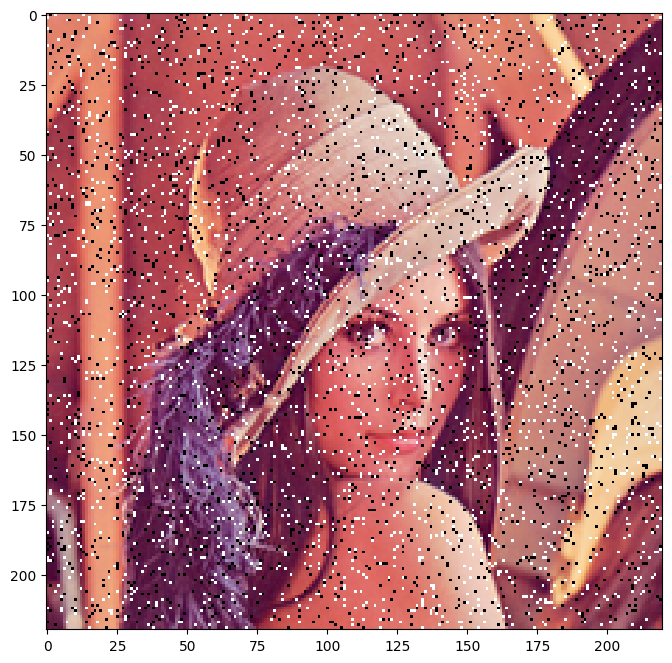

In [85]:
def salt_and_pepper_noise(image, pix_per):
    # noisey_image
    noisy_image = np.copy(image)
    
    # dimensions of the image
    height, width = image.shape[:2]

    # Generate a random mask for salt and pepper noise
    mask = np.random.choice([0, 1, 2], size=(height, width), p=[1 - pix_per, pix_per/2, pix_per/2])

    # Add salt and pepper noise to the image
    noisy_image[mask == 1] = 255  # Set salt noise to white
    noisy_image[mask == 2] = 0    # Set pepper noise to black

    return noisy_image

# Apply salt and pepper noise to the image with a density of 0.05
noisy_image = salt_and_pepper_noise(image2, 0.1)
display(noisy_image)


### Salt pepper noise on GRAY Image

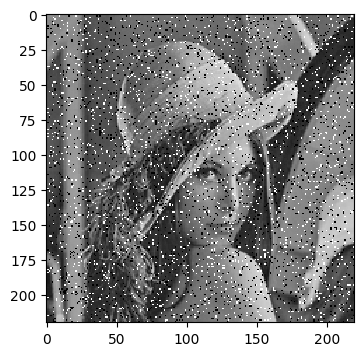

True

In [94]:
import cv2
import numpy as np

img = image2

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Add salt and pepper noise
noise_amount = 0.1  # 10% of the pixels will be affected by the noise
noise = np.zeros_like(gray_img)
cv2.randu(noise, 0, 255)
salt = noise <= int(255 * noise_amount / 2)
pepper = noise >= 255 - int(255 * noise_amount / 2)
gray_img[salt] = 0
gray_img[pepper] = 255

display(gray_img)
# Save the noisy image
cv2.imwrite('noisy_gray_image.jpg', gray_img)


In [37]:
l = np.array([1,3,1,4,34,23,1])
p = np.zeros_like(l)
p[l<4] = 1
p[l>100-4/2] = 0
p

array([1, 1, 1, 0, 0, 0, 1])

## b)
### Median Filtering

For 3*3 filter:


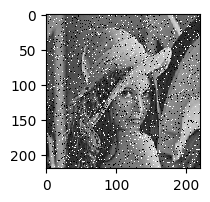

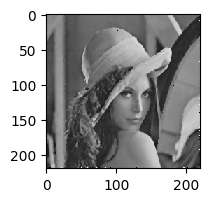

For 5*5 filter:


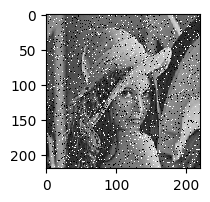

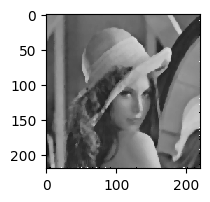

For 11*11 filter:


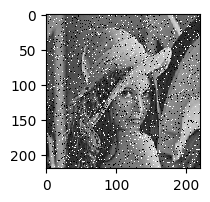

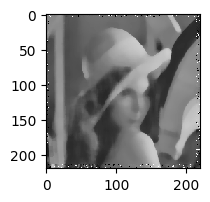

In [99]:
def median_filter(image, kernel_size):
    # Copy the input image
    filtered_image = np.copy(image)

    # dimensions of the image and the kernel
    height, width = image.shape[:2]
    k = kernel_size // 2

    # Apply the median filter to each channel of the image
    for i in range(k, height - k):
        for j in range(k, width - k):
            filtered_image[i, j] = np.median(image[i-k:i+k+1, j-k:j+k+1])
                

    return filtered_image


# def med_fil(image2,h,w,med):
#     filtered_img = np.zeros_like(image2)
#     #median filtering
#     for i in range(med, h + med):
#         for j in range(med, w + med):
#             # arranging
#             try:
#                 filtered_img[i, j,:] = np.median(image2[i-med:i+med+1, j-med:j+med+1,:])
#             except IndexError:
#                 pass
#     return filtered_img

def display(img):
    plt.rcParams['figure.figsize'] = (4.0, 2.0)
    plt.imshow(img)
    plt.show()
    
noisy_image = np.array(Image.open('noisy_gray_image.jpg'))

# Display the original and filtered images
print("For 3*3 filter:")
display(noisy_image)
median_filtered_salty_peppy_image = median_filter(noisy_image, 3)
display(median_filter(noisy_image, 3))
print("For 5*5 filter:")
display(noisy_image)
display(median_filter(noisy_image, 5))
print("For 11*11 filter:")
display(noisy_image)
display(median_filter(noisy_image, 11))

Increasing the kernel size in median filtering has two main effects:

Smoothing: As the kernel size increases, the median filter becomes more effective at smoothing out small-scale variations or noise in the image. This is because the larger kernel can capture more local information and reduce the impact of isolated noisy pixels or small-scale details.

Blurring: As the kernel size increases further, the median filter can start to blur or remove larger-scale details or features in the image. This is because the larger kernel can average out or remove more of the pixel values in the window, including some of the signal information. This can lead to loss of sharpness, contrast, or texture in the image.

### Question 3
#### Gaussian Filtering

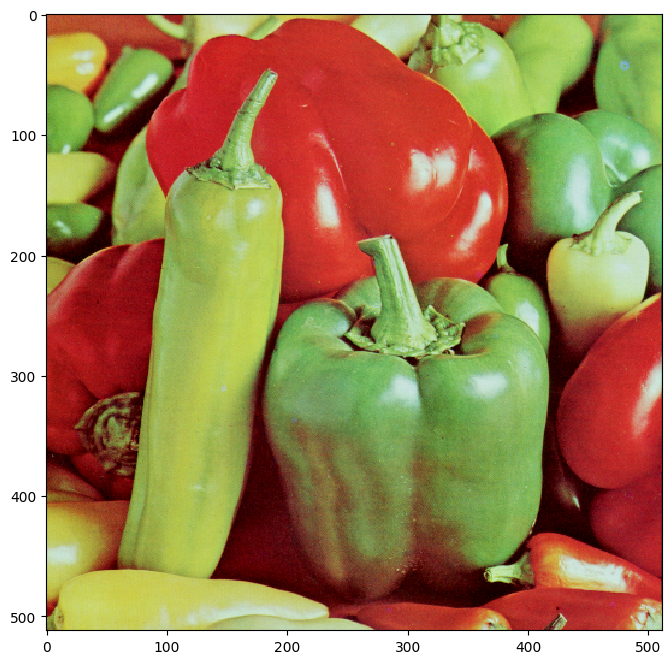

In [81]:
image3 = io.imread(image3_path,plugin='matplotlib')
display(image3)

Original Image:


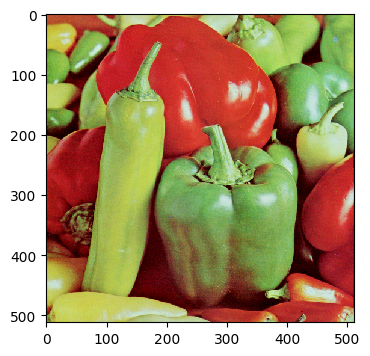

For the Kernel size 3:
For the Kernal Size 3 having sigma values is 1


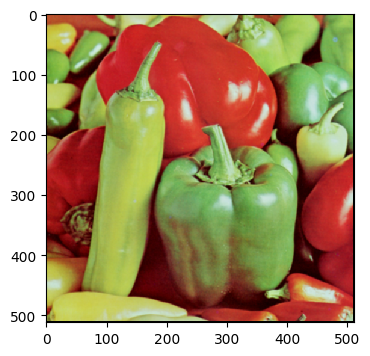

For the Kernal Size 3 having sigma values is 2


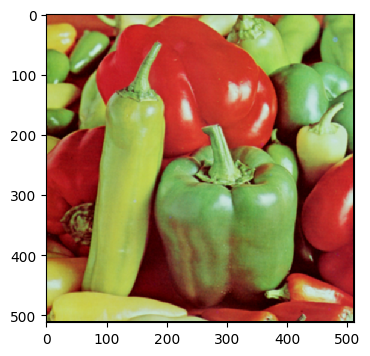

For the Kernal Size 3 having sigma values is 3


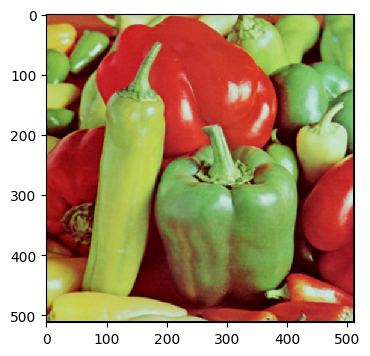

For the Kernal Size 3 having sigma values is 4


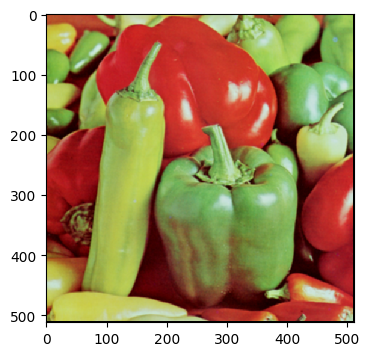

For the Kernel size 5:
For the Kernal Size 5 having sigma values is 1


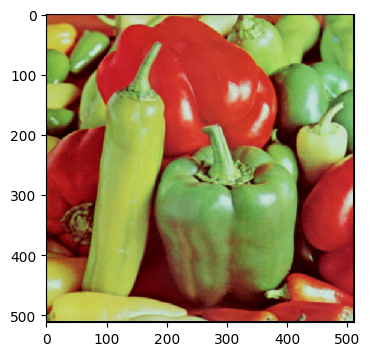

For the Kernal Size 5 having sigma values is 2


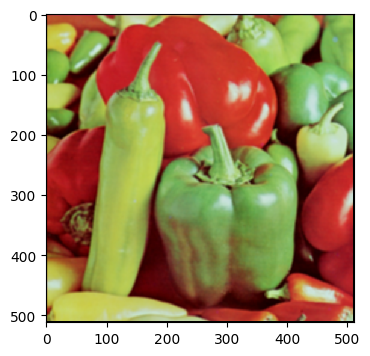

For the Kernal Size 5 having sigma values is 3


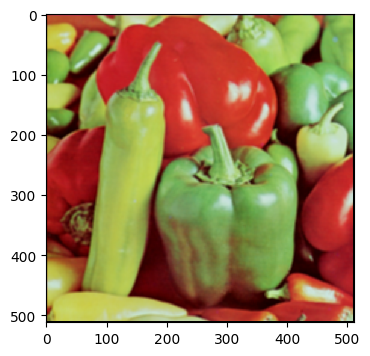

For the Kernal Size 5 having sigma values is 4


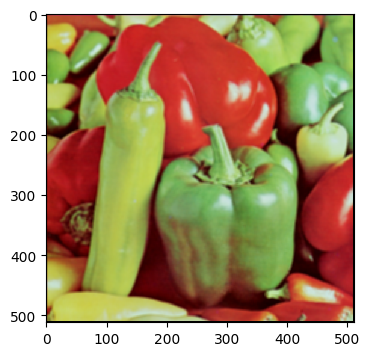

For the Kernel size 11:
For the Kernal Size 11 having sigma values is 1


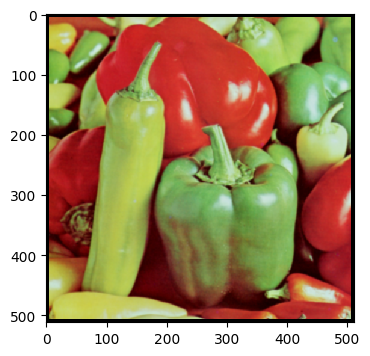

For the Kernal Size 11 having sigma values is 2


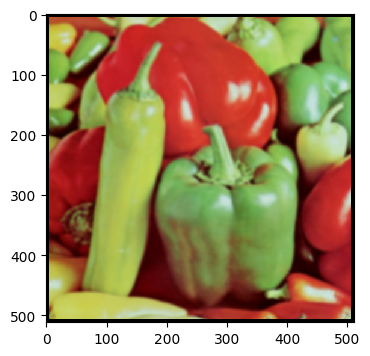

For the Kernal Size 11 having sigma values is 3


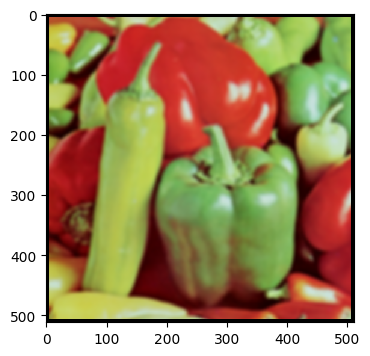

For the Kernal Size 11 having sigma values is 4


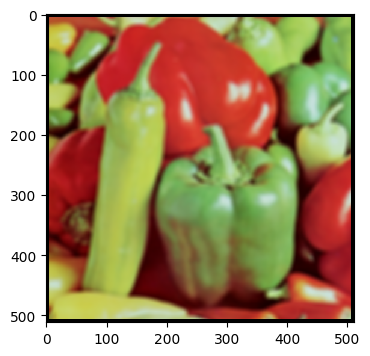

In [129]:
def gauss(img,sigma,ksize):
    # Create a Gaussian kernel
    kernel = np.zeros((ksize, ksize))
    for i in range(ksize):
        for j in range(ksize):
            x = i - ksize // 2
            y = j - ksize // 2
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)

    # Apply Gaussian filtering to the image
    filtered_img = np.zeros_like(img)
    for i in range(ksize // 2, img.shape[0] - ksize // 2):
        for j in range(ksize // 2, img.shape[1] - ksize // 2):
            for c in range(img.shape[2]):
                patch = img[i - ksize // 2:i + ksize // 2 + 1, j - ksize // 2:j + ksize // 2 + 1, c]
                filtered_img[i, j, c] = np.sum(patch * kernel)
    return filtered_img
def display(img):
    plt.rcParams['figure.figsize'] = (7.0,4.0)
    plt.imshow(img)
    plt.show()
#standard deviation and kernel size
# sigma = 1

print("Original Image:")
display(image3)
for ksize in [3,5,11]:
    print(f'For the Kernel size {ksize}:')
    for i in range(1,5):
        filtered_img = gauss(image3,i,ksize)
        print(f"For the Kernal Size {ksize} having sigma values is {i}")
        display(filtered_img)


Increasing the kernel size in Gaussian filtering has two main effects:

Smoothing: As the kernel size increases, the Gaussian filter becomes more effective at smoothing out small-scale variations or noise in the image. This is because the larger kernel can capture more local information and reduce the impact of isolated noisy pixels or small-scale details.

Blurring: As the kernel size increases further, the Gaussian filter can start to blur or remove larger-scale details or features in the image. This is because the larger kernel can average out or remove more of the pixel values in the window, including some of the signal information. This can lead to loss of sharpness, contrast, or texture in the image.

#### Gaussian Pyramid

In [61]:

def convolve(image, kernel):
    """
    Convolve the image with the given kernel
    """
    height, width = image.shape
    k_size = kernel.shape[0]
    center = k_size // 2
    filtered = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            value = 0
            for x in range(k_size):
                for y in range(k_size):
                    nx = i + x - center
                    ny = j + y - center
                    if nx >= 0 and nx < height and ny >= 0 and ny < width:
                        value += image[nx, ny] * kernel[x, y]
            filtered[i, j] = value
    return filtered

# Load the image
img = cv2.imread('image_3.png')

# Create a Gaussian kernel
size = 5
sigma = 1
kernel = np.zeros((size, size))
center = size // 2
for i in range(size):
    for j in range(size):
        x = i - center
        y = j - center
        kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalize the kernel
kernel = kernel / np.sum(kernel)

# Create a 3-level Gaussian pyramid
pyramid = [img]
for i in range(3):
    # Apply the Gaussian filter
    filtered = np.zeros_like(img)
    for c in range(3):
        filtered[:, :, c] = convolve(img[:, :, c], kernel)
    # Downsample the image
    img = filtered[::2, ::2, :]
    pyramid.append(img)

# Display the pyramid
for i in range(4):
    cv2.imshow('Level ' + str(i), pyramid[i])
cv2.waitKey(0)
cv2.destroyAllWindows()


#### Laplacian Kernal

In [55]:
# creating a laplacian kernel
# size of the kernel
size = 5

# standard deviation of the Gaussian kernel
sigma = 1

# Create a 1D array for the kernel indices
k = np.arange(-(size // 2), (size // 2) + 1)

# Create a 2D array for the kernel indices
x, y = np.meshgrid(k, k)

# Compute the Gaussian kernel
gauss = np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalize the Gaussian kernel
gauss /= np.sum(gauss)

# Compute the Laplacian kernel
lap_kernel = np.zeros((size, size))
lap_kernel = ((x**2 + y**2 - 2 * sigma**2) / (sigma**4)) * gauss
lap_kernel /= np.sum(np.abs(lap_kernel))

# Print the Laplacian kernel
print(lap_kernel)


[[ 0.01387825  0.03109901  0.03418239  0.03109901  0.01387825]
 [ 0.03109901  0.         -0.07659743  0.          0.03109901]
 [ 0.03418239 -0.07659743 -0.25257563 -0.07659743  0.03418239]
 [ 0.03109901  0.         -0.07659743  0.          0.03109901]
 [ 0.01387825  0.03109901  0.03418239  0.03109901  0.01387825]]


#### Laplacian Pyramid

In [65]:
def laplacian_kernel(size, sigma):
    """
    Generate a Laplacian kernel of a given size and standard deviation
    """
    kernel = np.zeros((size, size), dtype=np.float32)
    m = size // 2
    for i in range(-m, m+1):
        for j in range(-m, m+1):
            kernel[i+m, j+m] = (-1 / (np.pi * sigma ** 4)) * (1 - ((i ** 2 + j ** 2) / (2 * sigma ** 2))) * np.exp(-((i ** 2 + j ** 2) / (2 * sigma ** 2)))
    return kernel

def gaussian_kernel(size, sigma):
    """
    Generate a Gaussian kernel of a given size and standard deviation
    """
    kernel = np.zeros((size, size), dtype=np.float32)
    m = size // 2
    for i in range(-m, m+1):
        for j in range(-m, m+1):
            kernel[i+m, j+m] = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(i ** 2 + j ** 2) / (2 * sigma ** 2))
    return kernel

def downsample(image):
    """
    Downsample the image by a factor of 2 using Gaussian smoothing and subsampling
    """
    kernel = gaussian_kernel(5, 1)
    blurred = cv2.filter2D(image, -1, kernel)
    return blurred[::2, ::2]

def upsample(image):
    """
    Upsample the image by a factor of 2 using nearest-neighbor interpolation
    """
    return cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_NEAREST)

def laplacian_pyramid(image, levels):
    """
    Generate a Laplacian pyramid of the given image with the given number of levels
    """
    pyr = []
    for i in range(levels):
        blurred = downsample(image)
        upsampled = upsample(blurred)
        diff = image - upsampled[:image.shape[0], :image.shape[1], :]
        pyr.append(diff)
        image = blurred
    pyr.append(image)
    return pyr

# Load the image
image = cv2.imread('image_3.png')

# Generate the Laplacian pyramid
pyr = laplacian_pyramid(image, 3)

# Reconstruct the image from the Laplacian pyramid
reconstructed = pyr[2]
for i in range(1, -1, -1):
    reconstructed = upsample(reconstructed)
    reconstructed += pyr[i][:reconstructed.shape[0], :reconstructed.shape[1], :]

# Display the original and reconstructed images
cv2.imshow('Original', image)
for i in range(4):
    cv2.imshow('Level ' + str(i), reconstructed[i])
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
import cv2
import numpy as np
# laplasian pyramaid
def convolve(image, kernel):
    """
    Convolve the image with the given kernel
    """
    height, width = image.shape
    k_size = kernel.shape[0]
    center = k_size // 2
    filtered = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            value = 0
            for x in range(k_size):
                for y in range(k_size):
                    nx = i + x - center
                    ny = j + y - center
                    if nx >= 0 and nx < height and ny >= 0 and ny < width:
                        value += image[nx, ny] * kernel[x, y]
            filtered[i, j] = value
    return filtered
# Load the image
img = cv2.imread('image_3.png')
# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = gray_img

# Create a Gaussian kernel
size = 5
sigma = 1
kernel = np.zeros((size, size))
center = size // 2
for i in range(size):
    for j in range(size):
        x = i - center
        y = j - center
        kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalize the kernel
kernel = kernel / np.sum(kernel)

# Create a 3-level Gaussian pyramid
pyramid_gauss = [img]
for i in range(3):
    # Apply the Gaussian filter
    filtered = np.zeros_like(img)
    
    filtered[:, :] = convolve(img[:, :], kernel)
    # Downsample the image
    img = filtered[::2, ::2]
    pyramid_gauss.append(img)
    
def upscaled(p_g):
    # Compute the new image size
    new_width = int(p_g.shape[1] * 2)
    new_height = int(p_g.shape[0] * 2)

    # Create a new empty image
    upscaled_img = np.zeros((new_height, new_width), dtype=np.uint8)

    # Iterate over each pixel in the upscaled image
    for y in range(new_height):
        for x in range(new_width):
            # Compute the corresponding pixel in the original image
            original_x = int(x / 2)
            original_y = int(y / 2)
        
            # Get the color of the corresponding pixel in the original image
            color = p_g[original_y, original_x]
        
            # Set the color of the corresponding pixel in the upscaled image
            upscaled_img[y, x] = color
    return upscaled_img
    
    
pyramid_laplacian = []
for i in range(len(pyramid_gauss) - 1):
    img1_1 = pyramid_gauss[i] - upscaled(pyramid_gauss[i + 1])
    pyramid_laplacian.append(img1_1)
    

# Display the pyramid
for i in range(3):
    cv2.imshow('Level ' + str(i), pyramid_laplacian[i])
cv2.waitKey(0)

-1

In [7]:
import cv2

# Load the image in RGB format
img = cv2.imread('image_3.png')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
cv2.imshow('Grayscale Image', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
display(img)

array([[[ 14,  17,  47],
        [ 31,  35,  91],
        [ 34,  36,  97],
        ...,
        [ 53,  83,  73],
        [ 54,  90,  85],
        [ 49,  84,  80]],

       [[ 19,  35,  87],
        [ 41,  75, 170],
        [ 42,  79, 176],
        ...,
        [ 83, 179, 135],
        [ 87, 190, 152],
        [ 80, 177, 141]],

       [[ 22,  49,  86],
        [ 43, 109, 176],
        [ 43, 121, 185],
        ...,
        [ 85, 191, 144],
        [ 87, 197, 152],
        [ 79, 181, 138]],

       ...,

       [[ 15,  41,  82],
        [ 45, 122, 162],
        [ 80, 193, 191],
        ...,
        [ 54,  70, 198],
        [ 78, 108, 199],
        [ 75, 104, 182]],

       [[ 14,  33,  73],
        [ 50, 127, 154],
        [ 75, 191, 188],
        ...,
        [ 78, 108, 200],
        [125, 161, 193],
        [120, 160, 174]],

       [[ 20,  52,  65],
        [ 53, 135, 141],
        [ 66, 172, 173],
        ...,
        [ 96, 135, 185],
        [138, 171, 176],
        [131, 167, 154]]

#### Average filter using Library

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


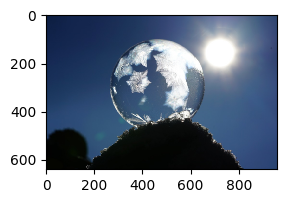

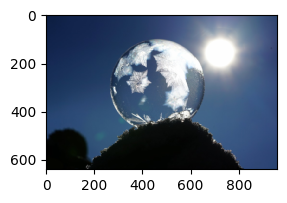

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


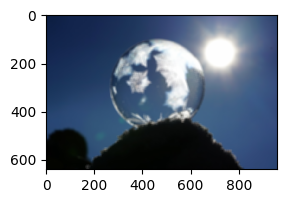

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


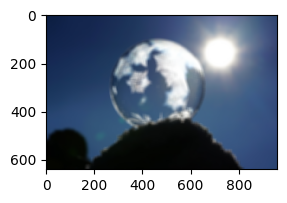

In [66]:
# Define 3x3 kernel for averaging
kernel_3 = np.ones((3,3), np.float32) / 9
# Define 3x3 kernel for averaging
kernel_5 = np.ones((5,5), np.float32) / 25
# Define 3x3 kernel for averaging
kernel_11 = np.ones((11,11), np.float32) / 121
# Define 3x3 kernel for averaging
kernel_15 = np.ones((15, 15), np.float32) / 225

# Apply filter
filtered_img_3_lib = cv2.filter2D(image1, -1, kernel_3)
# Apply filter
filtered_img_5_lib = cv2.filter2D(image1, -1, kernel_5)
# Apply filter
filtered_img_11_lib = cv2.filter2D(image1, -1, kernel_11)
# Apply filter
filtered_img_15_lib = cv2.filter2D(image1, -1, kernel_15)
def display(img):
    plt.rcParams['figure.figsize'] = (4.0, 2.0)
    plt.imshow(img)
    plt.show()
display(filtered_img_3_lib)
display(filtered_img_5_lib)
display(filtered_img_11_lib)
display(filtered_img_15_lib)

## Comparing the results of Average Filter

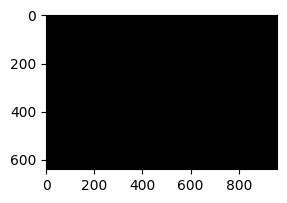

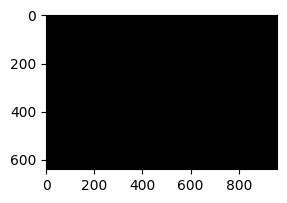

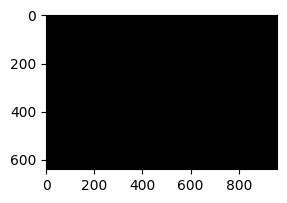

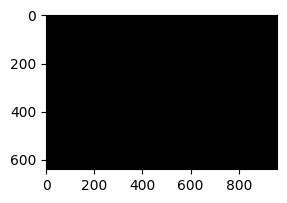

In [69]:
display(filtered_img_3_lib-filtered_img_3)
display(filtered_img_5_lib-filtered_img_5)
display(filtered_img_11_lib-filtered_img_11)
display(filtered_img_15_lib-filtered_img_15)

#### Salt and pepper noise using library

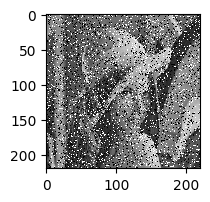

In [118]:
# Add salt and pepper noise to the image
noisy_img_lib = random_noise(noisy_image, mode='s&p', amount=0.1)
cv2.imwrite('filtered_image.png', noisy_img_lib)
display(noisy_img_lib)

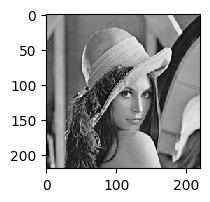

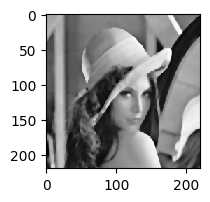

True

In [126]:
import cv2
import numpy as np

# Load the input image
img = cv2.imread('image_2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply salt and pepper noise to the image
# noise = np.zeros(img.shape, np.uint8)
# cv2.randu(noise, 0, 255)
# salt = noise > 245
# pepper = noise < 10
# img[salt] = 255
# img[pepper] = 0

# Display the noisy image
display(img)

# Apply a median filter with a kernel size of 5x5
filtered = cv2.medianBlur(img, 5)

display(filtered)

# Save the filtered image
cv2.imwrite('filtered_image.jpg', filtered)


### Comapring Median filter

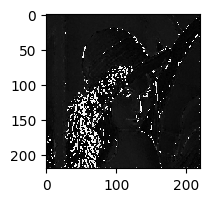

In [127]:
display(filtered-median_filtered_salty_peppy_image)

In [ ]:
import cv2

# Load the image
img = cv2.imread('image_3.png')

# Create a 3-level Gaussian pyramid
pyramid = [img]
for i in range(3):
    img = cv2.pyrDown(img)
    pyramid.append(img)

# Display the pyramid
for i in range(4):
    cv2.imshow('Level ' + str(i), pyramid[i])
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import time
import os

IMAGES_DIRECTORY = ''
OUTPUT_DIRECTORY = 'outputs/'
IMAGE_NAMES = [
    'image_1.jpg',
    'image_2.png',
    'image_3.png',
]

BALANCE_ALPHA = 0.2


def output_image(display_name, save_name, image):
    cv2.imshow(display_name, image)
    cv2.imwrite(OUTPUT_DIRECTORY + save_name, image)
    print("Image %s%s is saved." % (OUTPUT_DIRECTORY, save_name))


def get_kernel():
    return np.ones((3, 3), np.float32) / 9


def get_mean_with_kernel(filter_area, kernel):
    # Fastest solution to multiply the matrices and get the result.
    return np.sum(np.multiply(kernel, filter_area))

    """
    This is also slower, since it requires this operation to be done for each of the channels.
    average = 0
    for i in range(3):
        average += np.sum(np.multiply(kernel, filter_area))
        
    return average
    """

    """
    Eliminated this loop based averaging, since it takes too much time.
    for krow in range(kernel_height):
        for kcol in range(kernel_width):
            row_index = row - (krow - middle_point)
            col_index = column - (kcol - middle_point)
            average_value += image[row_index][col_index][channel] * kernel[krow][kcol]

    return average_value
    """


def mean_filter(image, height, width):
    # Set the kernel.
    kernel = get_kernel()

    for row in range(1, height + 1):
        for column in range(1, width + 1):
            # Get the area to be filtered with range indexing.
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            res = get_mean_with_kernel(filter_area, kernel)
            image[row][column] = res

    return image


def get_median(filter_area):
    res = np.median(filter_area)
    return res


def median_filter(image, height, width):
    for row in range(1, height + 1):
        for column in range(1, width + 1):
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            image[row][column] = get_median(filter_area)

    return image


def mean_median_balanced_filter(image, height, width):
    for row in range(1, height + 1):
        for column in range(1, width + 1):
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            mean_filter_vector = get_mean_with_kernel(filter_area, get_kernel())
            median_filter_vector = get_median(filter_area)
            image[row][column] = BALANCE_ALPHA * mean_filter_vector + (1 - BALANCE_ALPHA) * median_filter_vector
    return image


def filter_image(image, image_name, filter_name, filtering_function):
    # Get the image size for the kernel looping.
    height, width = image.shape[:2]

    # Add 1px reflected padding to allow kernels to work properly.
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REFLECT)

    print("Calculating %s for %s" % (filter_name, image_name))
    start_time = time.time()
    res = filtering_function(image, height, width)
    print("Successfully calculated %s for %s in %s seconds." % (filter_name, image_name, str(time.time() - start_time)))

    return res


def main():
    if not os.path.exists(OUTPUT_DIRECTORY):
        os.makedirs(OUTPUT_DIRECTORY)

    for image_name in IMAGE_NAMES:
        # Read and print the original image.
        image = cv2.imread(IMAGES_DIRECTORY + image_name, 0)
        cv2.imshow('Original Image: %s' % image_name, image)

        # Calculate the mean filtered version and print the resulting image.
        filtered_image = filter_image(image, image_name, 'mean filter', mean_filter)
        output_image('Mean filtered Image: %s' % image_name, '%s_mean.jpg' % image_name, filtered_image)

        # Calculate the median filtered version and print the resulting image.
        filtered_image = filter_image(image, image_name, 'median filter', median_filter)
        output_image('Median filtered Image: %s' % image_name, '%s_median.jpg' % image_name, filtered_image)

        # Calculate the balanced filtered version and print the resulting image.
        filtered_image = filter_image(image, image_name, 'balanced filter', mean_median_balanced_filter)
        output_image('Mean & Median with balance %s filtered Image: %s' % (BALANCE_ALPHA, image_name),
                     '%s_mean_median%s.jpg' % (image_name, str(BALANCE_ALPHA)), filtered_image)

    print("Completed all of the images.")

    # Destroy all the images on any key press.
    cv2.waitKey(0)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    main()

Calculating mean filter for image_1.jpg
Successfully calculated mean filter for image_1.jpg in 3.95961332321167 seconds.
Image outputs/image_1.jpg_mean.jpg is saved.
Calculating median filter for image_1.jpg


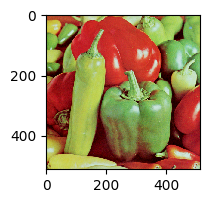

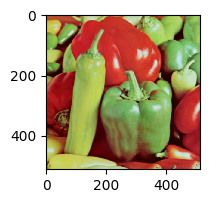

In [7]:
#Gaussian filtering

# standard deviation and kernel size
sigma = 1
ksize = (5, 5)

# cv2.GaussianBlur()
filtered_img = cv2.GaussianBlur(image3, ksize, sigma)

# Display the original and filtered images
display(image3)
display(filtered_img)


In [94]:
import cv2
import numpy as np
import pywt

# Load the original image and the watermark image
image = cv2.imread('image_3.png')
watermark = cv2.imread('watermark.png', 0)

# Convert the original image to YCbCr color space
ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)

# Apply the DWT to the Y channel of the YCbCr image
coeffs = pywt.dwt2(ycbcr[:,:,0], 'haar')

# Extract the LL subband coefficients
LL, (LH, HL, HH) = coeffs

# Scale the watermark to the size of the LL subband
scaled_watermark = cv2.resize(watermark, (LL.shape[1], LL.shape[0]))

# Embed the watermark into the LL subband coefficients
alpha = 0.1  # Watermark strength
LL_wm = LL + alpha * scaled_watermark.astype(np.float32)

# Reconstruct the YCbCr image from the modified LL subband coefficients and the other subband coefficients
ycbcr_wm = np.zeros_like(ycbcr)
ycbcr_wm[:,:,0] = pywt.idwt2((LL_wm, (LH, HL, HH)), 'haar')
ycbcr_wm[:,:,1:3] = ycbcr[:,:,1:3]

# Convert the watermarked YCbCr image back to RGB color space
watermarked_image = cv2.cvtColor(ycbcr_wm, cv2.COLOR_YCR_CB2BGR)

# Save the watermarked image
cv2.imwrite('watermarked.png', watermarked_image)


True

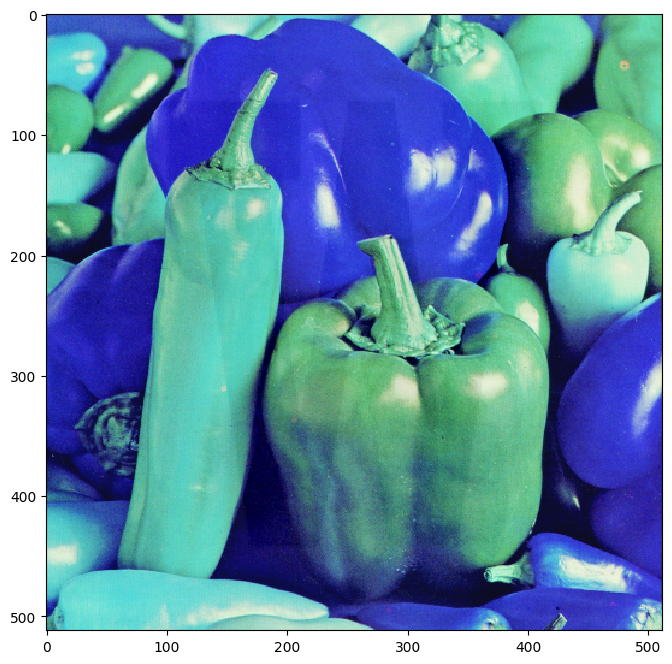

In [95]:
display(watermarked_image)

In [90]:
import pywt
import numpy as np
import cv2

# Load the grayscale image and the watermark image
img_gray = cv2.imread('image_3.png', cv2.IMREAD_GRAYSCALE)
img_watermark = cv2.imread('watermark.png', cv2.IMREAD_GRAYSCALE)

# Decompose the grayscale image using DWT
coeffs = pywt.dwt2(img_gray, 'haar')
cA, (cH, cV, cD) = coeffs

# Decompose the watermark image
coeffs_wm = pywt.wavedec2(img_watermark, 'haar', level=3)
cA_wm, coeffs_wm = pywt.coeffs_to_array(coeffs_wm)
coeffs_wm_flat = np.concatenate([np.atleast_2d(cH) for cH in coeffs_wm]).ravel()
cH_wm, cV_wm, cD_wm = np.split(coeffs_wm_flat, 3)

# Choose a level to embed the watermark in
level = 2

# Multiply the wavelet coefficients of the selected level by a scaling factor and add the watermark coefficients to them
alpha = 0.1
cH[level] += alpha * cH_wm[level]
cV[level] += alpha * cV_wm[level]
cD[level] += alpha * cD_wm[level]

# Reconstruct the image using the inverse DWT to obtain the watermarked image
coeffs_new = (cA, (cH, cV, cD))
img_watermarked = pywt.idwt2(coeffs_new, 'haar')

# Display the watermarked image
cv2.imshow('Watermarked Image', img_watermarked)
cv2.waitKey(0)
cv2.destroyAllWindows()


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1

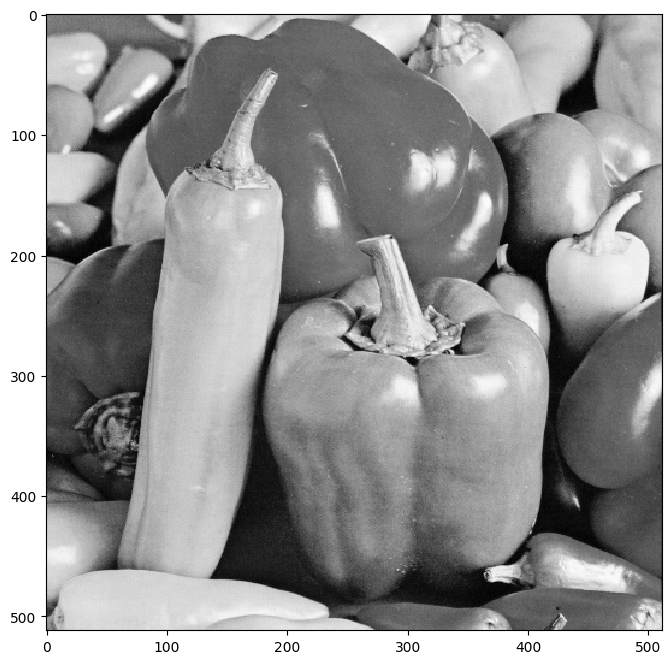

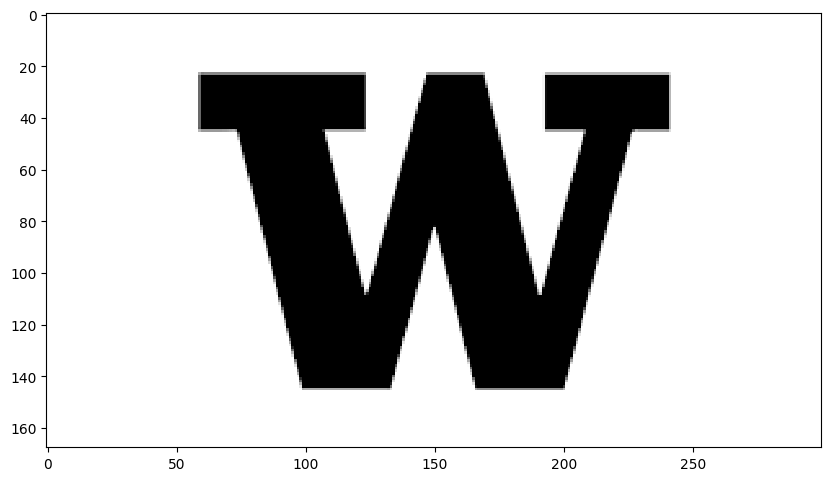

In [85]:
image = cv2.imread('image_3.png',cv2.IMREAD_GRAYSCALE)
watermark = cv2.imread('watermark.png', cv2.IMREAD_GRAYSCALE)
display(image)
display(watermark)